# Sample model using Keras with TF backend

Welcome to the course!

This is an introduction lession to help you understand few key starting points using Keras. We are using tensorflow(default) as our backend, but you can use 'theano' or 'CNTK'.

**NOTE:**
If you are running on the TensorFlow or CNTK backends, your code will automatically run on GPU if any available GPU is detected.

In [85]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**One of the Method:** manually set theano.config.device, theano.config.floatX at the beginning of your code:


In [86]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

Good to be in the latest version of Keras. 

In [87]:
keras.__version__

'2.1.5'

In [88]:
train_labels = []
train_samples = []

## Generated Data

1. An experiemental drug was tested on individuals from age 13 to 100.
2. The trial had 2100 participants. Half were below 65 years, half were above 65 years old.
3. 95% of patients 65 or older experienced side effects.
4. 95% of patients under 65 expereinced no side effects.

In [89]:
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

    

In [90]:
# Display raw data
for i in train_samples:
    print(i)

43
93
21
71
63
72
16
65
42
79
46
73
22
85
23
98
34
94
37
66
37
91
29
66
39
77
56
87
43
100
30
86
17
91
52
68
45
83
54
87
50
70
40
67
45
82
46
74
13
100
47
91
49
69
51
87
43
66
14
70
59
76
25
89
20
87
23
87
15
95
30
72
64
77
39
69
56
90
27
75
59
85
22
78
21
100
31
96
52
67
57
92
34
80
31
85
21
75
61
72
21
70
34
77
55
87
37
93
45
91
33
65
19
89
56
78
43
81
45
82
47
90
18
77
41
69
60
71
38
84
21
98
45
94
54
73
23
74
18
78
42
83
47
89
16
85
13
95
22
94
52
78
39
91
23
87
57
98
23
68
41
91
43
93
47
82
24
71
41
72
63
69
53
91
55
65
33
90
45
69
25
79
23
75
60
99
37
70
22
66
15
68
42
67
22
75
53
74
33
68
47
74
28
70
16
83
52
91
48
81
16
99
36
65
55
70
47
79
49
88
41
100
63
71
36
71
39
90
49
71
46
73
38
91
38
67
27
78
35
98
62
84
29
82
16
71
16
91
31
85
40
87
47
71
52
70
15
85
42
68
52
76
61
96
48
76
31
87
55
71
18
78
60
78
56
92
64
87
40
79
59
73
35
75
44
98
42
89
18
98
23
72
60
74
61
78
39
82
54
83
54
99
17
84
61
76
46
91
63
87
27
89
18
85
59
85
62
88
14
82
34
92
17
82
51
83
18
88
46
85
39
76


In [91]:
# Display raw data
for i in train_labels:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Data tranformation

We cannot fed the raw data to the network, it needs to be transfored to make it normalized and standardized. 

In [92]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1, 1))


In [93]:
# Display scaled data
for i in scaled_train_samples:
    print (i)

[0.34482759]
[0.91954023]
[0.09195402]
[0.66666667]
[0.57471264]
[0.67816092]
[0.03448276]
[0.59770115]
[0.33333333]
[0.75862069]
[0.37931034]
[0.68965517]
[0.10344828]
[0.82758621]
[0.11494253]
[0.97701149]
[0.24137931]
[0.93103448]
[0.27586207]
[0.6091954]
[0.27586207]
[0.89655172]
[0.18390805]
[0.6091954]
[0.29885057]
[0.73563218]
[0.49425287]
[0.85057471]
[0.34482759]
[1.]
[0.1954023]
[0.83908046]
[0.04597701]
[0.89655172]
[0.44827586]
[0.63218391]
[0.36781609]
[0.8045977]
[0.47126437]
[0.85057471]
[0.42528736]
[0.65517241]
[0.31034483]
[0.62068966]
[0.36781609]
[0.79310345]
[0.37931034]
[0.70114943]
[0.]
[1.]
[0.3908046]
[0.89655172]
[0.4137931]
[0.64367816]
[0.43678161]
[0.85057471]
[0.34482759]
[0.6091954]
[0.01149425]
[0.65517241]
[0.52873563]
[0.72413793]
[0.13793103]
[0.87356322]
[0.08045977]
[0.85057471]
[0.11494253]
[0.85057471]
[0.02298851]
[0.94252874]
[0.1954023]
[0.67816092]
[0.5862069]
[0.73563218]
[0.29885057]
[0.64367816]
[0.49425287]
[0.88505747]
[0.16091954]
[0.712

[0.27586207]
[0.63218391]
[0.42528736]
[0.83908046]
[0.43678161]
[1.]
[0.32183908]
[0.73563218]
[0.20689655]
[0.70114943]
[0.33333333]
[0.82758621]
[0.27586207]
[0.65517241]
[0.55172414]
[0.71264368]
[0.3908046]
[0.91954023]
[0.18390805]
[0.89655172]
[0.45977011]
[0.7816092]
[0.03448276]
[0.91954023]
[0.40229885]
[0.65517241]
[0.34482759]
[0.79310345]
[0.32183908]
[0.64367816]
[0.45977011]
[0.94252874]
[0.51724138]
[0.65517241]
[0.49425287]
[0.64367816]
[0.31034483]
[0.75862069]
[0.16091954]
[0.75862069]
[0.05747126]
[0.65517241]
[0.05747126]
[0.95402299]
[0.57471264]
[0.8045977]
[0.24137931]
[0.63218391]
[0.29885057]
[0.7816092]
[0.28735632]
[0.87356322]
[0.06896552]
[0.97701149]
[0.40229885]
[0.64367816]
[0.42528736]
[0.63218391]
[0.03448276]
[0.81609195]
[0.47126437]
[0.75862069]
[0.10344828]
[0.8045977]
[0.24137931]
[0.83908046]
[0.24137931]
[0.65517241]
[0.5862069]
[0.97701149]
[0.12643678]
[0.81609195]
[0.3908046]
[0.93103448]
[0.49425287]
[0.91954023]
[0.37931034]
[0.83908046]
[

[0.65517241]
[0.3908046]
[0.86206897]
[0.45977011]
[0.7816092]
[0.]
[0.70114943]
[0.32183908]
[0.75862069]
[0.52873563]
[0.97701149]
[0.47126437]
[0.98850575]
[0.02298851]
[0.95402299]
[0.03448276]
[0.86206897]
[0.01149425]
[0.97701149]
[0.13793103]
[0.6091954]
[0.11494253]
[0.7816092]
[0.16091954]
[0.66666667]
[0.50574713]
[0.93103448]
[0.52873563]
[0.66666667]
[0.03448276]
[0.95402299]
[0.17241379]
[0.68965517]
[0.17241379]
[0.8045977]
[0.3908046]
[0.65517241]
[0.09195402]
[0.73563218]
[0.45977011]
[0.81609195]
[0.50574713]
[0.66666667]
[0.40229885]
[0.94252874]
[0.26436782]
[0.72413793]
[0.40229885]
[0.89655172]
[0.03448276]
[0.86206897]
[0.06896552]
[0.74712644]
[0.09195402]
[0.86206897]
[0.17241379]
[0.85057471]
[0.54022989]
[0.93103448]
[0.56321839]
[0.65517241]
[0.42528736]
[0.89655172]
[0.09195402]
[0.96551724]
[0.50574713]
[0.72413793]
[0.45977011]
[0.94252874]
[0.01149425]
[0.81609195]
[0.37931034]
[0.59770115]
[0.12643678]
[0.94252874]
[0.05747126]
[0.90804598]
[0.29885057]


To visualize the model/graph, model.summary() can give you the summary of the architecture output.  

In [94]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(axis=1),
    Dense(2, activation='softmax')
])


In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 770
Trainable params: 706
Non-trainable params: 64
_________________________________________________________________


## Configures the model for training.

Now, that our model/grpah is ready, we can run optimizer and we are going to use Adam.

**Optimizers:** Most of the well know optimzers can be found [here](http://ruder.io/optimizing-gradient-descent/).

**Loss Function:** Find most of the loss function [here](https://isaacchanghau.github.io/2017/06/07/Loss-Functions-in-Artificial-Neural-Networks/). 

In [13]:
model.compile(Adam(lr=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Validation set

Validation set can be given either as a seperate set or let Keras split the validation set from testing set. 

In [14]:
#valid_set = [(sample, label), (sample, label), (sample, label)]
#model.fit(scaled_train_samples, train_labels, validation_data=valid_set, batch_size=10, epochs=20, shuffle=True, verbose=2)

## To start the training,
We have to call fit(), Validation_split will split the training data and put x% of the images into validation set.

Let us play a bit! 

**validation_split**: splits the training data randomly into two parts, trianing and validation based on the percentage specified. DISCLAIMER: this is not recommended practise, avoid doing this on the production network, another important tip, avoid augementing validation data. 

Play time!!!
change validation precentage and see the difference. This will give you intution about how data is fit/overfit/underfit.

In [15]:
model.fit(scaled_train_samples, train_labels, validation_split=0.4, batch_size=2, epochs=3, shuffle=True, verbose=2)

Train on 1260 samples, validate on 840 samples
Epoch 1/3
 - 1s - loss: 0.6616 - acc: 0.7492 - val_loss: 0.6052 - val_acc: 0.8167
Epoch 2/3
 - 1s - loss: 0.6096 - acc: 0.7643 - val_loss: 0.5473 - val_acc: 0.8488
Epoch 3/3
 - 1s - loss: 0.5747 - acc: 0.7524 - val_loss: 0.5114 - val_acc: 0.8393


**Play with few hyper parameters:**
    1. Batch size
    2. Learning Rate (model.optimizer.lr = 0.001)
    3. epochs
    4. May be also with Optimizers and loss function. 

## Save Model



In [77]:
model.save('sample_model.h5')

AttributeError: 'float' object has no attribute 'eval'

This save() function save following:

    1. The architecture of the model, allowing to create the model.
    2. The weights of the model.
    3. The training configuration of the model (loss, optimizer).
    4. The state of the optimizer, allowing training to resume from where you left before.

## Load Model

In [78]:
from keras.models import load_model
new_model = load_model('sample_model.h5')

In [79]:
new_model.summary()
new_model.get_weights()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 770
Trainable params: 706
Non-trainable params: 64
_________________________________________________________________


[array([[-0.09543636, -0.44162607,  0.31219733, -0.0920282 , -0.4967454 ,
          0.47902945,  0.34320617, -0.0060457 , -0.5361095 ,  0.16908893,
          0.2120688 ,  0.38254827, -0.27826896, -0.13836601, -0.21113983,
          0.12282033]], dtype=float32),
 array([ 0.        ,  0.        , -0.01887254,  0.        ,  0.        ,
         0.0028232 , -0.01296826,  0.        ,  0.        , -0.0551942 ,
         0.02819035, -0.05186576,  0.        ,  0.        ,  0.        ,
        -0.04376166], dtype=float32),
 array([[ 0.05996096, -0.01698551,  0.13121527, -0.16010517, -0.06427824,
         -0.0832375 , -0.04342407,  0.17179564, -0.06089908, -0.3532001 ,
          0.08820274, -0.3476583 ,  0.31826112,  0.12388325,  0.03762203,
          0.21845046,  0.10764685, -0.18597616, -0.1363292 ,  0.2420415 ,
          0.02503288,  0.22932217, -0.31371957, -0.11133495,  0.19587973,
         -0.11135231, -0.26489574, -0.29725835,  0.18157122, -0.30051604,
         -0.13346769, -0.33226871],
 

## Predict

Create a test set and use that to test the model.

In [80]:
test_labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
test_samples = [15, 30, 45, 60, 64, 68, 70, 72, 75, 80]

test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = test_scaler.fit_transform((test_samples).reshape(-1, 1))

predictions = model.predict(scaled_test_samples, verbose=1, steps=1)

1/1 [==============================] - 0s 78ms/step


In [81]:
predictions

array([[0.95427   , 0.04572997],
       [0.9396955 , 0.06030454],
       [0.7822802 , 0.21771985],
       [0.20783737, 0.79216266],
       [0.12287907, 0.8771209 ],
       [0.08204214, 0.91795784],
       [0.06662948, 0.93337053],
       [0.05394212, 0.94605786],
       [0.0391094 , 0.96089065],
       [0.02267977, 0.9773202 ]], dtype=float32)

## Confusion Matrix

In [82]:
cm_plot_labels = ['no-effect', 'effect']
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [2 3]]


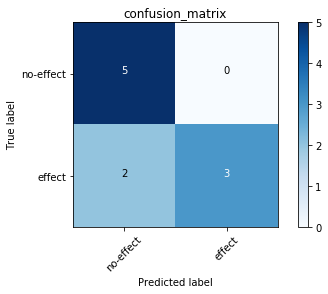

In [84]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')